In [2]:
library(tidyverse)

Warning message:
"package 'ggplot2' was built under R version 4.3.1"
Warning message:
"package 'purrr' was built under R version 4.3.1"
Warning message:
"package 'dplyr' was built under R version 4.3.1"
── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# Coding Part

## Read Data and make it tidy

In [3]:
#From github Read
#ds <- read.csv("https://raw.githubusercontent.com/ZackYe42/STAT344-GroupProject/main/cities_air_quality_water_pollution.18-10-2021.csv",header = T)

#From Local
ds <- read.csv("cities_air_quality_water_pollution.csv",header = T,sep = ",")

#There is a space befor each string data, we want remove that
ds <- ds %>%
  mutate_at(vars(City, Region, Country), trimws)

#Some Region is NA, we want use city name to replace that
ds <- ds %>%
  mutate(Region = ifelse(Region == "", City, Region))

In [4]:
head(ds,3)

,City,Region,Country,AirQuality,WaterPollution
,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,New York City,New York,United States of America,46.81604,49.50495
2,"Washington, D.C.",District of Columbia,United States of America,66.12903,49.10714
3,San Francisco,California,United States of America,60.51402,43.00000


## Preselect Data 

In this project, we will only use data from China

In [5]:
#filter People's Republic of China's data
ds1 <- ds %>% 
     filter(Country == "People\'s Republic of China")
head(ds1)
N <- nrow(ds1)
N

,City,Region,Country,AirQuality,WaterPollution
,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,Beijing,Beijing,People's Republic of China,21.366279,70.78313
2,Hangzhou,Zhejiang,People's Republic of China,25.694444,62.93103
3,Xi'an,Shaanxi,People's Republic of China,5.952381,72.05882
4,Lhasa,Tibet,People's Republic of China,12.500000,50.00000
5,Shanghai,Shanghai,People's Republic of China,25.000000,67.58475
6,Shenyang,Liaoning,People's Republic of China,6.250000,76.56250


[1] 238

# Visulization

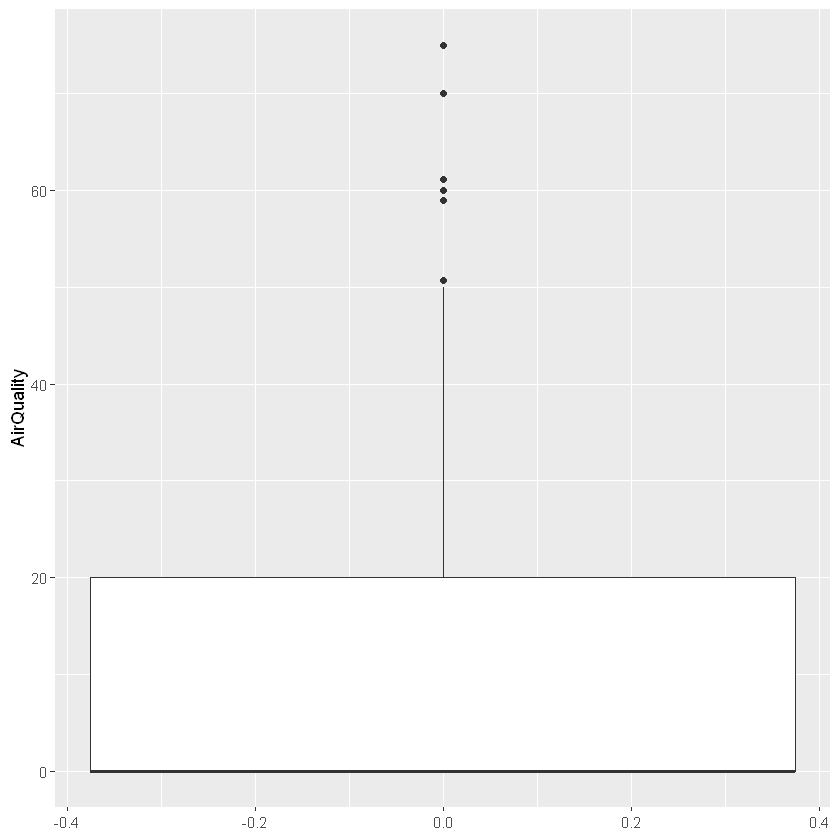

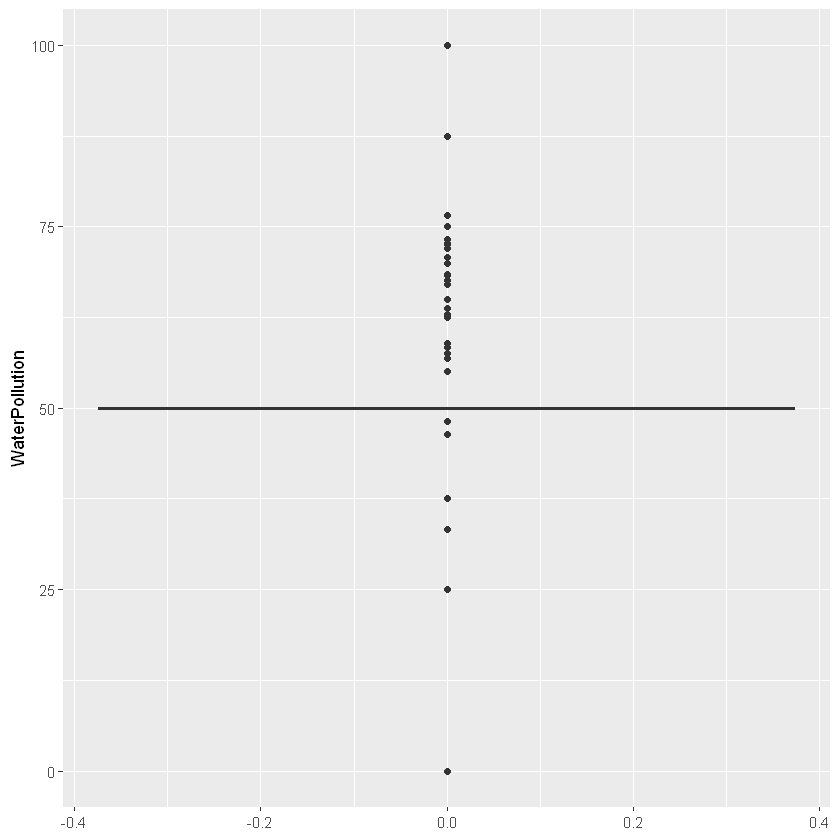

In [6]:
air_box <- ds1 %>% 
    ggplot() +
    geom_boxplot(aes(y = AirQuality))
air_box

h2o_box <- ds1 %>% 
    ggplot() +
    geom_boxplot(aes(y = WaterPollution))
h2o_box

# True Mean

In [7]:
air_mu <- mean(ds1$AirQuality)
h2o_mu <- mean(ds1$WaterPollution)
cat("The mean for chinese air quality is ", air_mu,
   "\nThe mean for chinese water pollution is ", h2o_mu)

The mean for chinese air quality is  10.76107 
The mean for chinese water pollution is  54.61749

## SRS Method

In [8]:
# SRS Sample 

set.seed(42)
n <- 50
srs <- sample_n(ds1,n)

In [9]:
# FPC
fpc <- (1 - n / N)

In [10]:
#Calculate Mean and SE

air_srs_mu <- mean(srs$AirQuality)
air_srs_se <- sd(srs$AirQuality) / sqrt(n / fpc)

h2o_srs_mu <- mean(srs$WaterPollution)
h2o_srs_se <- sd(srs$WaterPollution) / sqrt(n / fpc)

cat("The mean for SRS air quality is ", air_srs_mu, ", the se for is ", air_srs_se,
   "\nThe mean for SRS water pollution is ", h2o_srs_mu,", the se for is ", h2o_srs_se)

The mean for SRS air quality is  11.05067 , the se for is  2.253126 
The mean for SRS water pollution is  52.91816 , the se for is  1.925419

# Stratified 

In [11]:
# Northern and Southern regions based on a simplified traditional division
north_region <- c("Beijing", "Liaoning", "Tianjin", "Heilongjiang", "Shanxi", "Jilin", "Hebei", "Shandong", "Inner Mongolia", "Siping", "Shaanxi")
south_region <- c("Zhejiang", "Tibet", "Shanghai", "Chongqing", "Hubei", "Guangdong", "Jiangsu", "Xinjiang", "Guizhou", "Sichuan", "Henan", "Jiangxi", "Guangxi", "Fujian", "Qinghai", "Anhui", "Hunan", "Yunnan", "Gansu", "Hainan", "Ningxia")

north <- ds1 %>% 
    filter(Region %in% north_region)
south <- ds1 %>% 
    filter(Region %in% south_region)

N_nor <- nrow(north)
N_sou <- nrow(south)

w_nor <- N_nor / N
w_sou <- N_sou / N

n_nor <- round(w_nor * n,0)
n_sou <- round(w_sou * n,0)

fpc_nor <- 1 - n_nor / N
fpc_sou <- 1 - n_sou / N

In [12]:
# Stratified Sample
set.seed(42)
str_nor <- sample_n(north,n_nor)
str_sou <- sample_n(south,n_sou)

In [13]:
#Calculate Mean and SE

# Mean
air_str_n_mu <- mean(str_nor$AirQuality)  
air_str_s_mu <- mean(str_sou$AirQuality)  

air_str_mu <- w_nor * air_str_n_mu + w_sou * air_str_s_mu

h2o_str_n_mu <- mean(str_nor$WaterPollution)  
h2o_str_s_mu <- mean(str_sou$WaterPollution)  

h2o_str_mu <- w_nor * h2o_str_n_mu + w_sou * h2o_str_s_mu

# SE  
air_str_n_se <- sqrt(w_nor^2 * fpc_nor * var(str_nor$AirQuality) / n_nor)  
air_str_s_se <- sqrt(w_sou^2 * fpc_sou * var(str_sou$AirQuality) / n_sou)  
air_str_se <- sqrt(air_str_n_se^2 + air_str_s_se^2)

h2o_str_n_se <- sqrt(w_nor^2 * fpc_nor * var(str_nor$WaterPollution) / n_nor)  
h2o_str_s_se <- sqrt(w_sou^2 * fpc_sou * var(str_sou$WaterPollution) / n_sou)  
h2o_str_se <- sqrt(air_str_n_se^2 + air_str_s_se^2)

cat("The mean for Stratified air quality is ", air_str_mu, ", the se for is ", air_str_se,
   "\nThe mean for Stratified water pollution is ", h2o_str_mu,", the se for is ", h2o_str_se)

The mean for Stratified air quality is  11.75607 , the se for is  1.941197 
The mean for Stratified water pollution is  53.49975 , the se for is  1.941197